<a href="https://colab.research.google.com/github/mahapara2411/devopsgit/blob/main/CLV_using_different_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data Understanding**

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [2]:
from google.colab import files
uploaded = files.upload()

Saving online_retail_II.xlsx to online_retail_II.xlsx


In [3]:
df = pd.read_excel("online_retail_II.xlsx", sheet_name = ["Year 2009-2010", "Year 2010-2011"]) #reading the excel file

In [4]:
df1 = df["Year 2009-2010"]
df2 = df["Year 2010-2011"]

In [5]:
df = df1.append(df2) #combining the data
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [6]:
df.tail()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France
541909,581587,POST,POSTAGE,1,2011-12-09 12:50:00,18.00,12680.0,France


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1067371 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   CustomerID   824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 73.3+ MB


In [8]:
df.isna().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
CustomerID     243007
Country             0
dtype: int64

In [9]:
df.describe()

,Quantity,Price,CustomerID
count,1.067371e+06,1.067371e+06,824364.000000
mean,9.938898e+00,4.649388e+00,15324.638504
std,1.727058e+02,1.235531e+02,1697.464450
min,-8.099500e+04,-5.359436e+04,12346.000000
25%,1.000000e+00,1.250000e+00,13975.000000
50%,3.000000e+00,2.100000e+00,15255.000000
75%,1.000000e+01,4.150000e+00,16797.000000
max,8.099500e+04,3.897000e+04,18287.000000


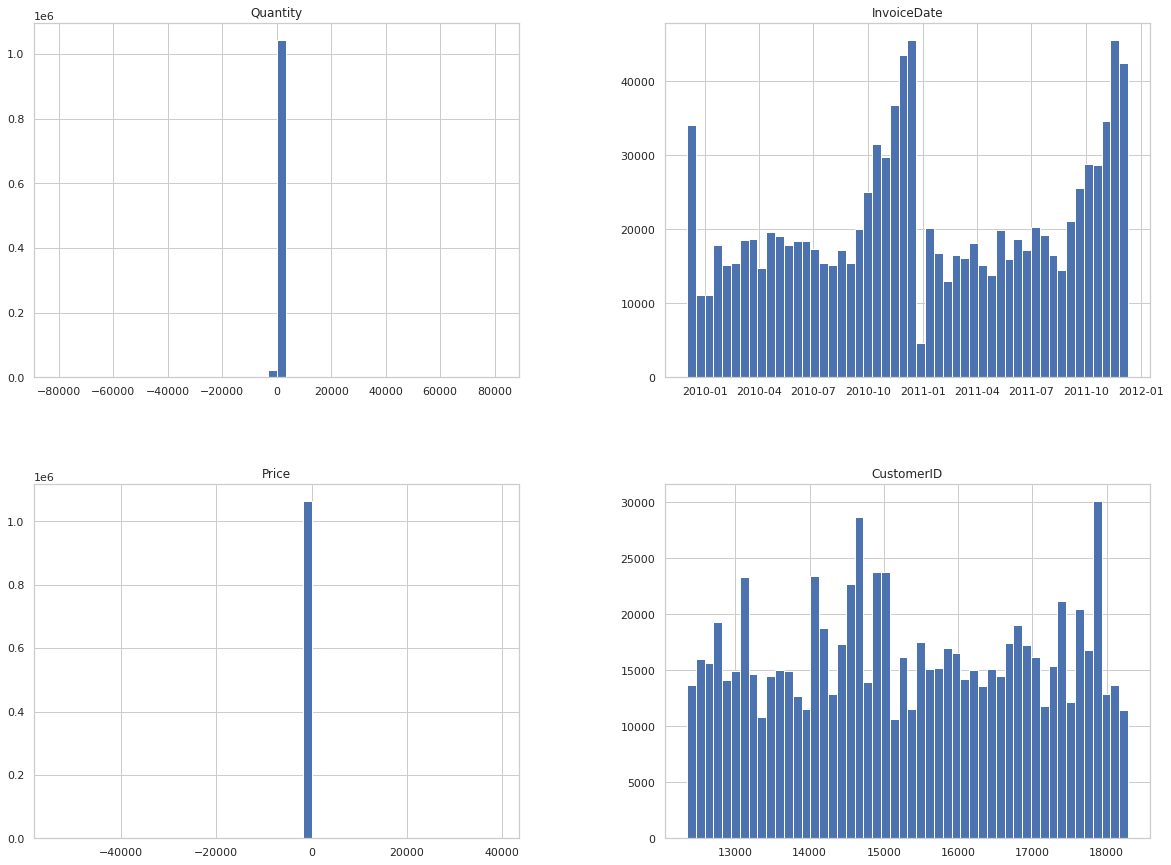

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()

In [11]:
df['Quantity'].describe()

count    1.067371e+06
mean     9.938898e+00
std      1.727058e+02
min     -8.099500e+04
25%      1.000000e+00
50%      3.000000e+00
75%      1.000000e+01
max      8.099500e+04
Name: Quantity, dtype: float64

(array([2.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+01, 2.2938e+04]),
 array([-8.09950e+04, -7.28956e+04, -6.47962e+04, -5.66968e+04,
        -4.85974e+04, -4.04980e+04, -3.23986e+04, -2.42992e+04,
        -1.61998e+04, -8.10040e+03, -1.00000e+00]),
 <a list of 10 Patch objects>)

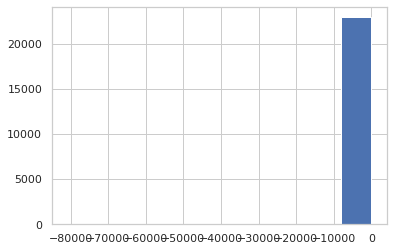

In [12]:
plt.hist(df['Quantity'][df['Quantity']<0])

In [14]:
df['Price'].describe()

count    1.067371e+06
mean     4.649388e+00
std      1.235531e+02
min     -5.359436e+04
25%      1.250000e+00
50%      2.100000e+00
75%      4.150000e+00
max      3.897000e+04
Name: Price, dtype: float64

(array([1., 0., 1., 1., 0., 0., 0., 0., 0., 2.]),
 array([-53594.36, -49341.13, -45087.9 , -40834.67, -36581.44, -32328.21,
        -28074.98, -23821.75, -19568.52, -15315.29, -11062.06]),
 <a list of 10 Patch objects>)

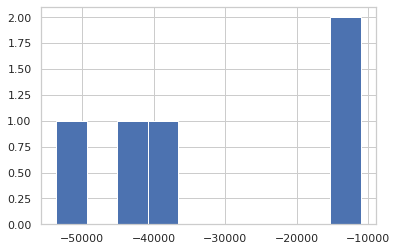

In [15]:
plt.hist(df['Price'][df['Price']<0])

In [16]:
# find out correlation between params
df.corr()

,Quantity,Price,CustomerID
Quantity,1.000000,-0.001319,-0.005430
Price,-0.001319,1.000000,-0.003835
CustomerID,-0.005430,-0.003835,1.000000


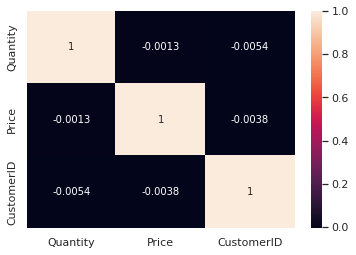

In [17]:
sns.heatmap(df.corr(),annot=True)

In [18]:
df3 = df.copy()
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1067371 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   CustomerID   824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 73.3+ MB


In [19]:
df3 = df3.dropna()
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 824364 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      824364 non-null  object        
 1   StockCode    824364 non-null  object        
 2   Description  824364 non-null  object        
 3   Quantity     824364 non-null  int64         
 4   InvoiceDate  824364 non-null  datetime64[ns]
 5   Price        824364 non-null  float64       
 6   CustomerID   824364 non-null  float64       
 7   Country      824364 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 56.6+ MB


In [20]:
df3['Quantity'][df3['Quantity']<=0] = None
df3['Quantity'].describe()

count    805620.000000
mean         13.307665
std         144.306739
min           1.000000
25%           2.000000
50%           5.000000
75%          12.000000
max       80995.000000
Name: Quantity, dtype: float64

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

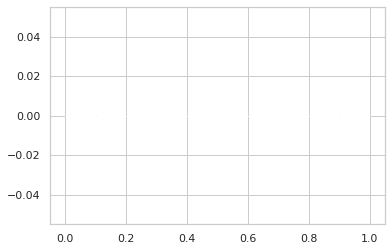

In [21]:
plt.hist(df3['Quantity'][df3['Quantity']<=0])

In [23]:
df3['Price'][df3['Price']<=0] = None
df3['Price'].describe()

count    824293.000000
mean          3.677116
std          70.244404
min           0.001000
25%           1.250000
50%           1.950000
75%           3.750000
max       38970.000000
Name: Price, dtype: float64

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

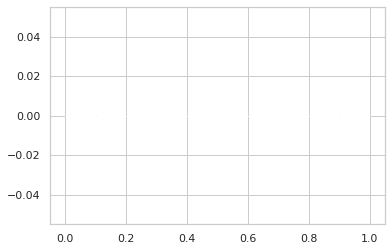

In [24]:
plt.hist(df3['Price'][df3['Price']<=0])

In [25]:
df3= df3.dropna()
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 805549 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      805549 non-null  object        
 1   StockCode    805549 non-null  object        
 2   Description  805549 non-null  object        
 3   Quantity     805549 non-null  float64       
 4   InvoiceDate  805549 non-null  datetime64[ns]
 5   Price        805549 non-null  float64       
 6   CustomerID   805549 non-null  float64       
 7   Country      805549 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 55.3+ MB


In [26]:
df3.drop(['StockCode','Description'], axis=1, inplace=True)
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 805549 entries, 0 to 541909
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      805549 non-null  object        
 1   Quantity     805549 non-null  float64       
 2   InvoiceDate  805549 non-null  datetime64[ns]
 3   Price        805549 non-null  float64       
 4   CustomerID   805549 non-null  float64       
 5   Country      805549 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 43.0+ MB


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [27]:
df3.head()

,Invoice,Quantity,InvoiceDate,Price,CustomerID,Country
0,489434,12.0,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,12.0,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,12.0,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,48.0,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,24.0,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [28]:
df3=df3.rename(columns={'CustomerID': 'ID_OF_CUSTOMER', 'InvoiceNo': 'NUMBER_OF_INVOICE',
                       'InvoiceDate': 'DATE_OF_INVOICE', 'Quantity': 'QUANTITY',
                       'Price': 'PRICE_OF_UNIT'})
df3.head()

,Invoice,QUANTITY,DATE_OF_INVOICE,PRICE_OF_UNIT,ID_OF_CUSTOMER,Country
0,489434,12.0,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,12.0,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,12.0,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,48.0,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,24.0,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


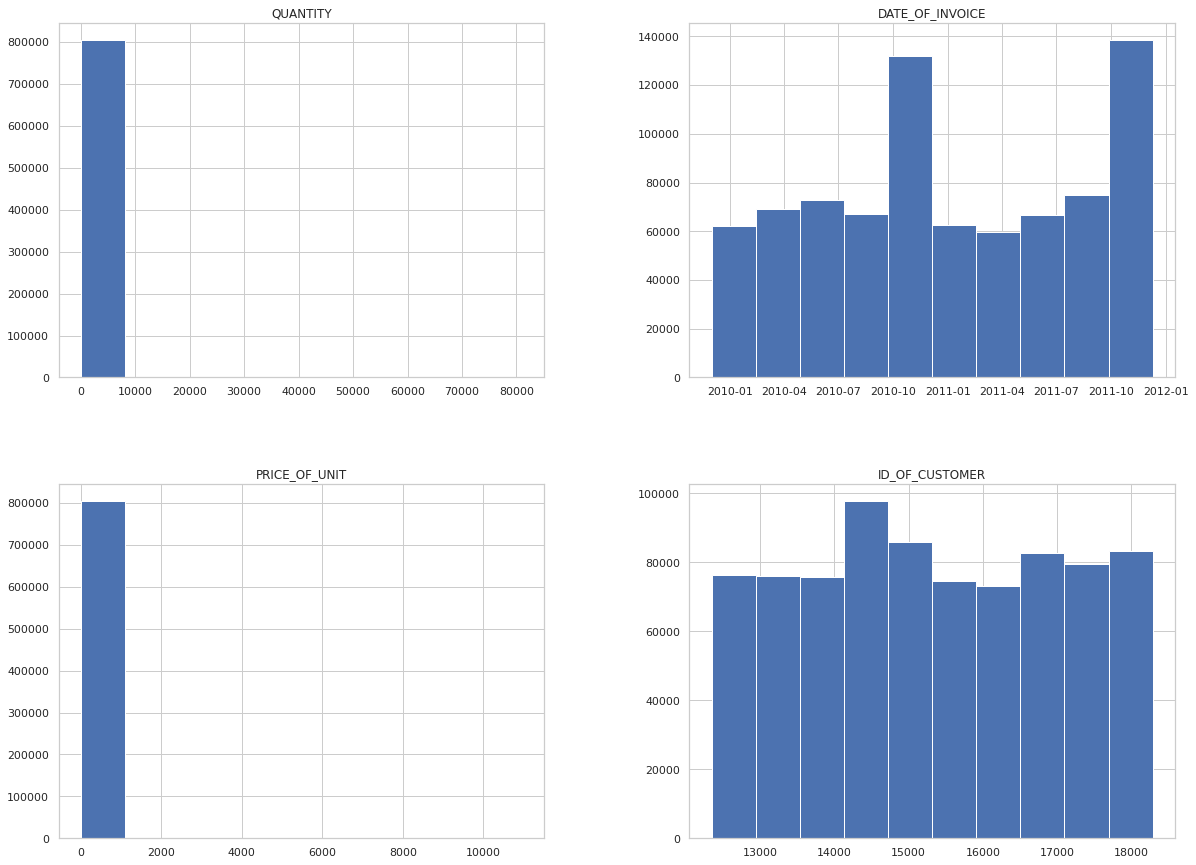

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
df3.hist(bins=10, figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()

In [31]:
# Calulate total purchase
df3['TOTAL_PURCHASE'] = df3['QUANTITY'] * df3['PRICE_OF_UNIT']
df3.head()

,Invoice,QUANTITY,DATE_OF_INVOICE,PRICE_OF_UNIT,ID_OF_CUSTOMER,Country,TOTAL_PURCHASE
0,489434,12.0,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,12.0,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,12.0,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,48.0,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,24.0,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


In [32]:
# Converting Pandas Series to DateTime in a DataFrame
df3['DATE_OF_INVOICE']=pd.to_datetime(df3['DATE_OF_INVOICE'])
df3.head()

,Invoice,QUANTITY,DATE_OF_INVOICE,PRICE_OF_UNIT,ID_OF_CUSTOMER,Country,TOTAL_PURCHASE
0,489434,12.0,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,12.0,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,12.0,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,48.0,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,24.0,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


In [33]:
# Extract month and year from InvoiceDate.
df3['MONTH_BY_YEAR'] = df3['DATE_OF_INVOICE'].apply(lambda x: x.strftime('%b-%Y'))
df3.head()

,Invoice,QUANTITY,DATE_OF_INVOICE,PRICE_OF_UNIT,ID_OF_CUSTOMER,Country,TOTAL_PURCHASE,MONTH_BY_YEAR
0,489434,12.0,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,Dec-2009
1,489434,12.0,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,Dec-2009
2,489434,12.0,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,Dec-2009
3,489434,48.0,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8,Dec-2009
4,489434,24.0,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0,Dec-2009


In [34]:
SALES=df3.pivot_table(index=['ID_OF_CUSTOMER'],columns=['MONTH_BY_YEAR'],values='TOTAL_PURCHASE',aggfunc='sum',fill_value=0).reset_index()
SALES.head()

MONTH_BY_YEAR,ID_OF_CUSTOMER,Apr-2010,Apr-2011,Aug-2010,Aug-2011,Dec-2009,Dec-2010,Dec-2011,Feb-2010,Feb-2011,Jan-2010,Jan-2011,Jul-2010,Jul-2011,Jun-2010,Jun-2011,Mar-2010,Mar-2011,May-2010,May-2011,Nov-2010,Nov-2011,Oct-2010,Oct-2011,Sep-2010,Sep-2011
0,12346.0,0.00,0.00,0.0,0.00,113.5,0.00,0.00,0.0,0.0,90.0,77183.60,0.0,0.0,142.31,0.00,27.05,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0
1,12347.0,0.00,636.25,0.0,584.91,0.0,1423.58,224.82,0.0,0.0,0.0,475.39,0.0,0.0,0.00,382.52,0.00,0.0,0.0,0.0,0.0,0.00,611.53,1294.32,0.00,0.0
2,12348.0,0.00,367.00,0.0,0.00,0.0,892.80,0.00,0.0,0.0,0.0,227.44,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,222.16,310.0
3,12349.0,1068.52,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,200.0,0.0,0.0,1757.55,1402.62,0.00,0.00,0.0
4,12350.0,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.0,334.4,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0


In [35]:
SALES['CLV']=SALES.iloc[:,2:].sum(axis=1)
SALES.head()

MONTH_BY_YEAR,ID_OF_CUSTOMER,Apr-2010,Apr-2011,Aug-2010,Aug-2011,Dec-2009,Dec-2010,Dec-2011,Feb-2010,Feb-2011,Jan-2010,Jan-2011,Jul-2010,Jul-2011,Jun-2010,Jun-2011,Mar-2010,Mar-2011,May-2010,May-2011,Nov-2010,Nov-2011,Oct-2010,Oct-2011,Sep-2010,Sep-2011,CLV
0,12346.0,0.00,0.00,0.0,0.00,113.5,0.00,0.00,0.0,0.0,90.0,77183.60,0.0,0.0,142.31,0.00,27.05,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,77556.46
1,12347.0,0.00,636.25,0.0,584.91,0.0,1423.58,224.82,0.0,0.0,0.0,475.39,0.0,0.0,0.00,382.52,0.00,0.0,0.0,0.0,0.0,0.00,611.53,1294.32,0.00,0.0,5633.32
2,12348.0,0.00,367.00,0.0,0.00,0.0,892.80,0.00,0.0,0.0,0.0,227.44,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,222.16,310.0,2019.40
3,12349.0,1068.52,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,200.0,0.0,0.0,1757.55,1402.62,0.00,0.00,0.0,3360.17
4,12350.0,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.0,334.4,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,334.40


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


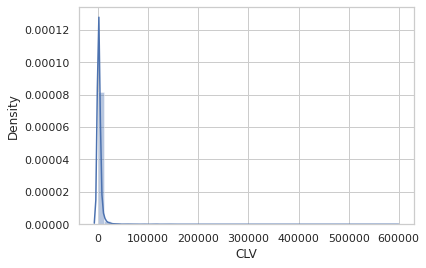

In [36]:
sns.distplot(SALES['CLV'],kde=True)

In [37]:
SALES['CLV'].describe()

count      5878.000000
mean       2917.458317
std       14389.798310
min           0.000000
25%         333.710000
50%         862.190000
75%        2220.007500
max      592225.100000
Name: CLV, dtype: float64

In [38]:
df4 = SALES[['ID_OF_CUSTOMER','Dec-2011','Nov-2011','Oct-2011','Sep-2011','Aug-2011','Jul-2011','CLV']]
df4.head()

MONTH_BY_YEAR,ID_OF_CUSTOMER,Dec-2011,Nov-2011,Oct-2011,Sep-2011,Aug-2011,Jul-2011,CLV
0,12346.0,0.00,0.00,0.00,0.0,0.00,0.0,77556.46
1,12347.0,224.82,0.00,1294.32,0.0,584.91,0.0,5633.32
2,12348.0,0.00,0.00,0.00,310.0,0.00,0.0,2019.40
3,12349.0,0.00,1757.55,0.00,0.0,0.00,0.0,3360.17
4,12350.0,0.00,0.00,0.00,0.0,0.00,0.0,334.40


In [39]:
df5 = pd.DataFrame({'ID_OF_CUSTOMER': SALES['ID_OF_CUSTOMER'],
                    'Dec-2011': SALES['Dec-2011'],
                    'Nov-2011': SALES['Nov-2011'],
                    'Oct-2011': SALES['Oct-2011'],
                    'Sep-2011': SALES['Sep-2011'],
                    'Aug-2011': SALES['Aug-2011'],
                    'Jul-2011': SALES['Jul-2011'],
                    'CLV': SALES['CLV']})
df5.head()

,ID_OF_CUSTOMER,Dec-2011,Nov-2011,Oct-2011,Sep-2011,Aug-2011,Jul-2011,CLV
0,12346.0,0.00,0.00,0.00,0.0,0.00,0.0,77556.46
1,12347.0,224.82,0.00,1294.32,0.0,584.91,0.0,5633.32
2,12348.0,0.00,0.00,0.00,310.0,0.00,0.0,2019.40
3,12349.0,0.00,1757.55,0.00,0.0,0.00,0.0,3360.17
4,12350.0,0.00,0.00,0.00,0.0,0.00,0.0,334.40


In [40]:
# find out correlation between params
df5.corr()

,ID_OF_CUSTOMER,Dec-2011,Nov-2011,Oct-2011,Sep-2011,Aug-2011,Jul-2011,CLV
ID_OF_CUSTOMER,1.000000,0.008867,-0.016271,-0.014471,0.008119,-0.020470,-0.007864,-0.009372
Dec-2011,0.008867,1.000000,0.111418,0.113410,0.083581,0.074546,0.073483,0.268572
Nov-2011,-0.016271,0.111418,1.000000,0.616020,0.674443,0.566028,0.509477,0.715616
Oct-2011,-0.014471,0.113410,0.616020,1.000000,0.562004,0.537468,0.539594,0.820019
Sep-2011,0.008119,0.083581,0.674443,0.562004,1.000000,0.467161,0.593568,0.750124
Aug-2011,-0.020470,0.074546,0.566028,0.537468,0.467161,1.000000,0.271539,0.652592
Jul-2011,-0.007864,0.073483,0.509477,0.539594,0.593568,0.271539,1.000000,0.717806
CLV,-0.009372,0.268572,0.715616,0.820019,0.750124,0.652592,0.717806,1.000000


In [41]:
corr_matrix = df5.corr()
corr_matrix["CLV"].sort_values(ascending=False)

CLV               1.000000
Oct-2011          0.820019
Sep-2011          0.750124
Jul-2011          0.717806
Nov-2011          0.715616
Aug-2011          0.652592
Dec-2011          0.268572
ID_OF_CUSTOMER   -0.009372
Name: CLV, dtype: float64

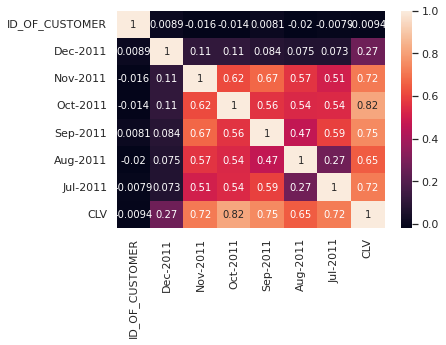

In [43]:
sns.heatmap(df5.corr(),annot=True)

**Modeling**

In [44]:
df5.columns

Index(['ID_OF_CUSTOMER', 'Dec-2011', 'Nov-2011', 'Oct-2011', 'Sep-2011',
       'Aug-2011', 'Jul-2011', 'CLV'],
      dtype='object')

In [45]:
X = df5[ ['Dec-2011', 'Nov-2011', 'Oct-2011', 'Sep-2011','Aug-2011','Jul-2011'] ]
y = df5[ ['CLV']]

In [46]:
clv_features = [X for i,X in enumerate(X.columns) if i!=6]

In [47]:
import statsmodels.api as st
X1 = st.add_constant(X)
reg_model=st.OLS(y,X1)
result=reg_model.fit()
print(result.summary2())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.904      
Dependent Variable: CLV              AIC:                115488.1413
Date:               2022-02-17 12:29 BIC:                115534.8941
No. Observations:   5878             Log-Likelihood:     -57737.    
Df Model:           6                F-statistic:        9191.      
Df Residuals:       5871             Prob (F-statistic): 0.00       
R-squared:          0.904            Scale:              1.9944e+07 
---------------------------------------------------------------------
               Coef.    Std.Err.     t     P>|t|    [0.025    0.975] 
---------------------------------------------------------------------
const         409.2904   59.7483   6.8502  0.0000  292.1618  526.4191
Dec-2011        1.0626    0.0263  40.4147  0.0000    1.0111    1.1142
Nov-2011        0.5978    0.0955   6.2596  0.0000    0.4106    0.7851
Oct-2011        4.5619    0.0715  63.7655  0.00

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [49]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [50]:
X_train1 = st.add_constant(X_train)
reg_model=st.OLS(y_train,X_train1)
result=reg_model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    CLV   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     3379.
Date:                Thu, 17 Feb 2022   Prob (F-statistic):               0.00
Time:                        12:31:00   Log-Likelihood:                -38282.
No. Observations:                3938   AIC:                         7.658e+04
Df Residuals:                    3931   BIC:                         7.662e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        632.3520     66.413      9.522      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [51]:
print("Precision of linear regression on training set: {:.3f}".format(regressor.score(X_train, y_train)))
print("Precision of linear regression on test set: {:.3f}".format(regressor.score(X_test, y_test)))

Precision of linear regression on training set: 0.838
Precision of linear regression on test set: 0.863


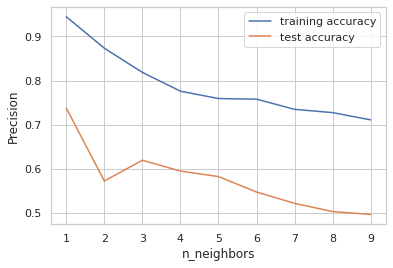

In [52]:
from sklearn.neighbors import KNeighborsRegressor
training_precision = []
test_precision = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 10)
for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsRegressor(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    # record training set precision
    training_precision.append(knn.score(X_train, y_train))
    # record test set precision
    test_precision.append(knn.score(X_test, y_test))
plt.plot(neighbors_settings, training_precision, label="training accuracy")
plt.plot(neighbors_settings, test_precision, label="test accuracy")
plt.ylabel("Precision")
plt.xlabel("n_neighbors")
plt.legend()
plt.savefig('knn_compare_model')

In [53]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
print("Precision of K-NN regressor on training set: {:.3f}".format(knn.score(X_train, y_train)))
print("Precision of K-NN regressor on test set: {:.3f}".format(knn.score(X_test, y_test)))

Precision of K-NN regressor on training set: 0.759
Precision of K-NN regressor on test set: 0.582


In [54]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [55]:
print("Precision of support vector regressor on training set: {:.2f}".format(svr.score(X_train, y_train)))
print("Precision of support vector regressor on test set: {:.2f}".format(svr.score(X_test, y_test)))

Precision of support vector regressor on training set: -0.03
Precision of support vector regressor on test set: -0.01


In [56]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [57]:
print("Feature importances:\n{}".format(dt.feature_importances_))

Feature importances:
[0.23004939 0.09053554 0.03118742 0.05929692 0.53402975 0.05490098]


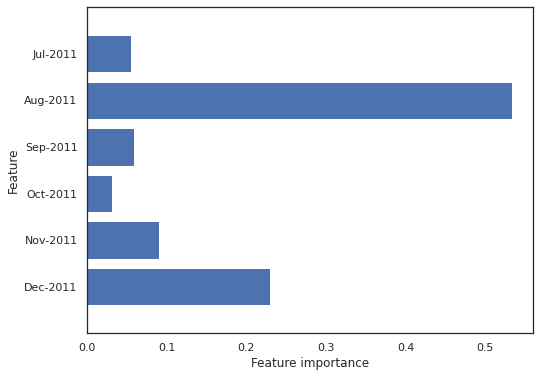

In [58]:
sns.set(style="white")

def plot_feature_importances_clv(model):
    plt.figure(figsize=(8,6))
    n_features = 6
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), clv_features)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
    
plot_feature_importances_clv(dt)

In [59]:
print("Precision of decision tree regressor on training set: {:.3f}".format(dt.score(X_train, y_train)))
print("Precision of decision tree regressor on test set: {:.3f}".format(dt.score(X_test, y_test)))

Precision of decision tree regressor on training set: 0.948
Precision of decision tree regressor on test set: 0.399


In [60]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(random_state=42)

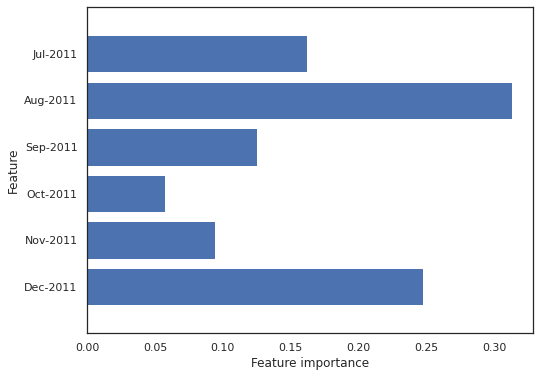

In [61]:
plot_feature_importances_clv(rf)

In [62]:
print("Precision of random forest regressor on training set: {:.3f}".format(rf.score(X_train, y_train)))
print("Precision of random forest regressor on test set: {:.3f}".format(rf.score(X_test, y_test)))

Precision of random forest regressor on training set: 0.910
Precision of random forest regressor on test set: 0.535


In [63]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(random_state=42)
gb.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(random_state=42)

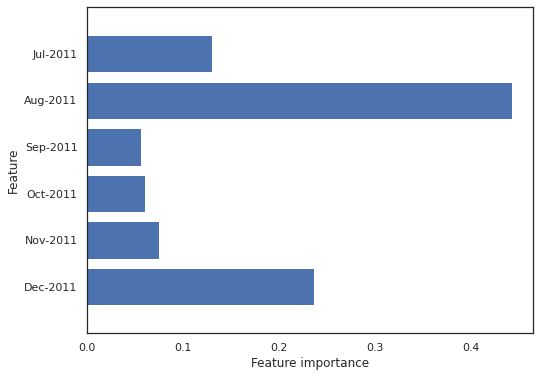

In [64]:
plot_feature_importances_clv(gb)

In [65]:
print("Precision of gradient boosting regressor on training set: {:.3f}".format(gb.score(X_train, y_train)))
print("Precision of gradient boosting regressor test set: {:.3f}".format(gb.score(X_test, y_test)))

Precision of gradient boosting regressor on training set: 0.924
Precision of gradient boosting regressor test set: 0.537


**Evaluation**

In [66]:
import numpy as np
from sklearn.metrics import mean_squared_error

In [67]:
y_pred_regressor = regressor.predict(X_test)

In [68]:
regressor_r = regressor.score(X_test, y_test)
print("Linear Regression R squared:","{:.2%}".format(regressor_r))

Linear Regression R squared: 86.29%


In [69]:
regressor_mse = mean_squared_error(y_pred_regressor, y_test)
regressor_rmse = np.sqrt(regressor_mse)
print('Linear Regression RMSE: %.4f' % regressor_rmse)

Linear Regression RMSE: 7624.6254


In [70]:
y_pred_knn = knn.predict(X_test)

In [71]:
knn_r = knn.score(X_test, y_test)
print("K-Nearest Neighbors R squared:","{:.2%}".format(knn_r))

K-Nearest Neighbors R squared: 58.21%


In [72]:
knn_mse = mean_squared_error(y_pred_knn, y_test)
knn_rmse = np.sqrt(knn_mse)
print('K-Nearest Neighbors RMSE: %.4f' % knn_rmse)

K-Nearest Neighbors RMSE: 13310.0902


In [73]:
y_pred_svr = svr.predict(X_test)

In [74]:
svr_r = svr.score(X_test, y_test)
print("Support Vector Machine R squared:","{:.2%}".format(svr_r))

Support Vector Machine R squared: -1.14%


In [75]:
svr_mse = mean_squared_error(y_pred_svr, y_test)
svr_rmse = np.sqrt(svr_mse)
print('Support Vector Machine RMSE: %.4f' % svr_rmse)

Support Vector Machine RMSE: 20706.1530


In [76]:
y_pred_dt = dt.predict(X_test)

In [77]:
dt_r = dt.score(X_test, y_test)
print("Decision Tree R squared:","{:.2%}".format(dt_r))

Decision Tree R squared: 39.89%


In [78]:
dt_mse = mean_squared_error(y_pred_dt, y_test)
dt_rmse = np.sqrt(dt_mse)
print('Decision Tree RMSE: %.4f' % dt_rmse)

Decision Tree RMSE: 15963.2796


In [79]:
y_pred_rf = rf.predict(X_test)

In [80]:
rf_r = rf.score(X_test, y_test)
print("Random Forest R squared:","{:.2%}".format(rf_r))

Random Forest R squared: 53.52%


In [81]:
rf_mse = mean_squared_error(y_pred_rf, y_test)
rf_rmse = np.sqrt(rf_mse)
print('Random Forest RMSE: %.4f' % rf_rmse)

Random Forest RMSE: 14036.7202


In [82]:
y_pred_gb = gb.predict(X_test)

In [83]:
gb_r = gb.score(X_test, y_test)
print("Gradient Boosting R squared:","{:.2%}".format(gb_r))

Gradient Boosting R squared: 53.67%


In [84]:
gb_mse = mean_squared_error(y_pred_gb, y_test)
gb_rmse = np.sqrt(gb_mse)
print('Gradient Boosting RMSE: %.4f' % gb_rmse)

Gradient Boosting RMSE: 14014.8721


In [85]:
models = ['Linear Regression','K-Nearest Neighbors', 
          'Support Vector Machine', 'Decision Tree',
          'Random Forest', 'Gradient Boosting']
tests_rmse = [regressor_rmse, knn_rmse, svr_rmse, dt_rmse, rf_rmse, gb_rmse]
tests_r = [regressor_r, knn_r, svr_r, dt_r, rf_r, gb_r]

In [86]:
compare_models = pd.DataFrame({ "Algorithms": models, "Tests RMSE": tests_rmse })
compare_models.sort_values(by = "Tests RMSE", ascending = True)

,Algorithms,Tests RMSE
0,Linear Regression,7624.625358
1,K-Nearest Neighbors,13310.090242
5,Gradient Boosting,14014.872058
4,Random Forest,14036.720202
3,Decision Tree,15963.279561
2,Support Vector Machine,20706.152997


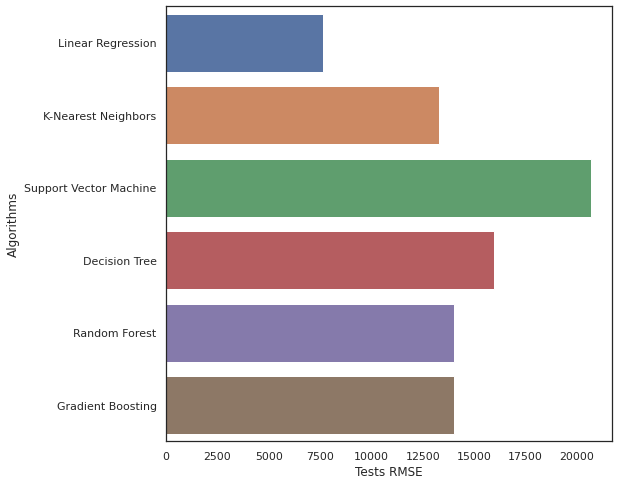

In [87]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(8,8))
sns.barplot(x = "Tests RMSE", y = "Algorithms", data = compare_models)
plt.show()

In [88]:
compare_models = pd.DataFrame({ "Algorithms": models, "Tests R Squared": tests_r  })
compare_models.sort_values(by = "Tests R Squared", ascending = False)

,Algorithms,Tests R Squared
0,Linear Regression,0.862860
1,K-Nearest Neighbors,0.582084
5,Gradient Boosting,0.536654
4,Random Forest,0.535208
3,Decision Tree,0.398866
2,Support Vector Machine,-0.011407


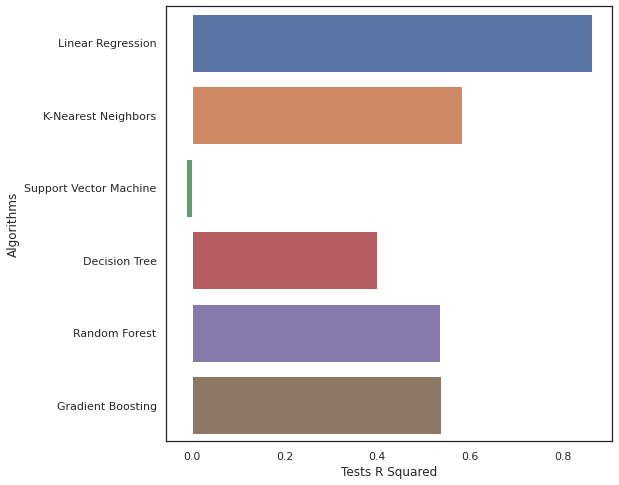

In [89]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(8,8))
sns.barplot(x = "Tests R Squared", y = "Algorithms", data = compare_models)
plt.show()

**Deployment**

In [90]:
a = float(input("Please enter the revenue from a customer one month ago:"))
b = float(input("Please enter the revenue from a customer two months ago:"))
c = float(input("Please enter the revenue from a customer three months ago :"))
d = float(input("Please enter the revenue from a customer four months ago:"))
e = float(input("Please enter the revenue from a customer five months ago :"))
f = float(input("Please enter the revenue from a customer six months ago:"))
new_data = np.array([a,b,c,d,e,f]).reshape(1,-1)
new_pred=regressor.predict(new_data)
new_pred1 = int(new_pred[0][0])

print("\033[1m The customer CLV is:", '${:,.0f}'.format(new_pred1))

Please enter the revenue from a customer one month ago:22251
Please enter the revenue from a customer two months ago:6900
Please enter the revenue from a customer three months ago :18851
Please enter the revenue from a customer four months ago:3869
Please enter the revenue from a customer five months ago :6448
Please enter the revenue from a customer six months ago:3541
 The customer CLV is: $146,319


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [91]:
ExpectedValue = new_pred1
ExpectedValue

146319

In [92]:
StandardError = int(regressor_rmse)
StandardError 

7624

In [93]:
import scipy.stats as si
def normsinv(x):
    x = si.norm.ppf(x)
    return (x)

In [94]:
alpha = 1 - 0.99
Z = round(abs(normsinv(0.5*alpha)),3)
Z

2.576

In [95]:
Upper = int(ExpectedValue + Z * StandardError)
Upper

165958

In [96]:
Lower = int(ExpectedValue - Z * StandardError)
Lower

126679

In [97]:
print("\033[1m With a confidence level of 99%, the CLV of the Customer is between " '${:,.0f}'.format(Lower),"and",'${:,.0f}.'.format(Upper),"The average value the CLV is " '${:,.0f}.'.format(ExpectedValue))

 With a confidence level of 99%, the CLV of the Customer is between $126,679 and $165,958. The average value the CLV is $146,319.
